In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/salaries.csv')
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [3]:
inputs=df.drop('salary_more_then_100k',axis='columns')
target = df.salary_more_then_100k

In [4]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [5]:
inputs['company_n']=le_company.fit_transform(inputs['company'])
inputs['job_n']=le_company.fit_transform(inputs['job'])
inputs['degree_n']=le_company.fit_transform(inputs['degree'])

In [6]:
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [7]:
inputs_n = inputs.drop(['company','job','degree'],axis='columns')

In [8]:
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test = train_test_split(inputs_n,target,test_size=0.2,random_state=2)

In [11]:
X_train.shape,X_test.shape

((12, 3), (4, 3))

In [12]:
from sklearn import tree
model=tree.DecisionTreeClassifier()

In [13]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

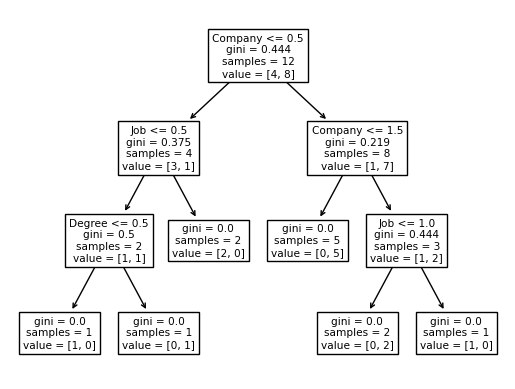

In [14]:
tree.plot_tree(model,feature_names=['Company','Job','Degree'])
plt.show()

In [15]:
model.score(X_test,y_test)

0.75

In [19]:
y_pred = model.predict(X_test)

In [16]:
model.predict([[1,1,0]])

/home/aayush/anaconda3/envs/fuseenv/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [17]:
from sklearn.metrics import roc_auc_score,roc_curve, confusion_matrix, accuracy_score

In [18]:
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """
    
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

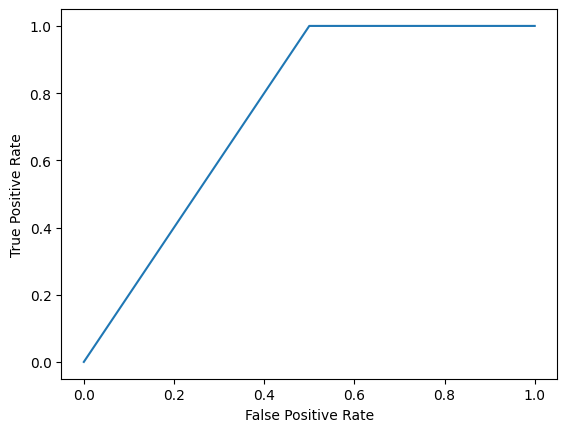

In [24]:
plot_roc_curve(y_test,y_pred)

In [25]:
roc_auc_score(y_test,y_pred)

0.75